# 1. Find the optimal for the following function:

$$max f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2} (1-\frac{0.5}{1+x^2}) + x$$


Use:
1. Quadratic Estimator
2. Newton - Rhapson method
3. Cuasi Newton method
4. Bisection method
5. Secant method

## Suficient and necessary conditions:

First derivative:

$$f'(x) = 0.5\frac{d(\frac{1}{1+x^2})}{dx} - \frac{d[(\sqrt{1+x^2})(1 - \frac{0.5}{1+x^2})]}{dx} + \frac{dx}{dx}$$

$$f'(x) = -\frac{x(1-\frac{1}{2(1+x^2)})}{\sqrt{1+x^2}}-\frac{3x}{2(1+x^2)^{3/2}}+1$$

$$f'(x) = \frac{(1+x^2)^{3/2} - x^3 - 2x}{(1+x^2)^{3/2}}$$

$$f'(x) = 1 - \frac{2x+x^3}{(1+x^2)^{3/2}}$$
Second derivative:

$$f''(x) = \frac{-x^2+2}{(1+x^2)^{5/2}}$$



In [337]:
import math

In [260]:
import matplotlib.pyplot as plt
import numpy as np

In [356]:
def f(x):
    global control
    control += 1
    #return (0.5/math.sqrt(1 + (x^2))) - (math.sqrt(1 + (x^2))*(1 - 0.5/(1+(x^2)))) + x
    return (0.5/(1+x**2)**(1/2)) - (1+x**2)**(1/2) * (1- (0.5/(1+x**2))) + x

def deriv_f(x):
    global control_primera
    control_primera +=1
    #numerador = ((1 + (x**2))**(3/2)) - (x**3) - 2.0*x
    #denominador = ((x**2)+1)**(3/2)
    #return numerador/denominador
    return 1-((2*x + x**3)/(1+x**2)**(3/2))

def second_deriv_f(x):
    global control_segunda
    control_segunda +=1
    return ((x**2 - 2))/((1 + (x**2))**5/2)

In [440]:
def Quadratic(x1, delta, epsilon):
    global control
    control = 0
    
    def Optimal(a1,a2,x1,x2):
        return ((x2+x1)/2) - (a1/(2*a2))
    
    def Get_A(f1,f2,f3,x1,x2,x3):
        a0 = f1
        a1 = (f2-f1)/(x2-x1)
        a2 = (1/(x3-x2))*(((f3-f1)/(x3-x1)) - a1)
        return a0,a1,a2
        
    x2 = x1+ delta
    f1 = -f(x1)
    f2 = -f(x2)
    
    if f1>f2:
        x3 = x1 + 2*delta
    else:
        x3 = x1 - delta
        
    x1,x2,x3 = sorted([x1,x2,x3])
    f1,f3,f3 = -f(x1), -f(x2), -f(x3)
    dic = {x1:f1, x2:f2, x3:f3}
    
    #fmin = f1
    #xmin = x1
    
    #a0,a1,a2 = Get_A(f1,f2,f3,x1,x2,x3)
    #xb = Optimal(a1,a2,x1,x2)
    #fb = -f(xb)
    #dic[xb] = fb
    
    while True:
        xmin, fmin = min(dic.items(), key = lambda x : x[1])
        a0,a1,a2 = Get_A(f1,f2,f3,x1,x2,x3)
        xb = Optimal(a1,a2,x1,x2)
        fb = -f(xb)
        
        if abs(xmin-xb)<=epsilon:
            break
            
        dic = {x1:f1, x2:f2, x3:f3, xb:fb}
        
        #Ordering by the value of the function, getting the best three points
        dic = dict(sorted(dic.items(), key = lambda x : x[1])[:3])
        dic = dict(sorted(dic.items(), key = lambda x : x[0]))
        x1 = list(dic.keys())[0]
        x2 = list(dic.keys())[1]
        x3 = list(dic.keys())[2]
        f1 = dic[x1]
        f2 = dic[x2]
        f3 = dic[x3]
        
    return (xb,-fb), control

In [441]:
x0 = float(0.0)
delta = float(0.1)
epsilon = float(0.0001)

In [442]:
Quadratic(0,0.1,0.0001)

((0.7861499421954391, 0.30028310600035), 14)

In [358]:
def Newton_Raphson(x,epsilon):
    global control_primera
    control_primera = 0
    
    fd = -deriv_f(x)
    fD2 = -second_deriv_f(x)
    while abs(fd)>epsilon:
        x = x - (fd/fD2)
        fd = -deriv_f(x)
        fD2 = -second_deriv_f(x)
        
    return (x, f(x)), control_primera

In [359]:
Newton_Raphson(0,0.0001)

((0.7863913962209089, 0.3002830940508953), 16)

In [495]:
def Cuasi_Newton(x, epsilon, delta):
    global control
    control = 0
    
    def d_1(fxMas, fxMenos, delta):
        return (fxMas - fxMenos)/(2*delta)
    def d_2(fxMas, fxMenos,fx, delta):
        return (fxMas - 2*fx + fxMenos)/(delta**2)
    
    xk = x
    while True:
        fxMas = -f(xk+delta)
        fxMenos = -f(xk-delta)
        fd = d_1(fxMas, fxMenos, delta)
        if not abs(fd) > epsilon:
            break
        xk -= (fd/d_2(fxMas, fxMenos, -f(xk), delta))
        
        #fd = d_1(fxMas, fxMenos, delta)
        #fD2 = d_2(fxMas, fxMenos, fx, delta)    
        
    return (xk, f(xk), control)
    

In [496]:
Cuasi_Newton(0, 0.0001, 0.01)

(0.7862107082758227, 0.3002831052704398, 18)

In [241]:
def Bisection(epsilon, a, b):
    global control_primera
    control_primera = 0
    
    
    while True:
        z = (a+b)/2
        fz = -deriv_f(z)
        if abs(fz)<=epsilon:
            break
            
        if fz<0:
            a = z
        else:
            b = z
        z = (a+b)/2
        fz = deriv_f(z)
    return (z,f(z)), control_primera

In [242]:
Bisection(0.0001, 0, 5)

((0.7861328125, 0.3002831059292606), 19)

In [228]:
def Secant(epsilon, xl, xr):
    global control_primera
    control_primera=0
    f_r = -deriv_f(xr)
    f_l = -deriv_f(xl)

    z = xr - (f_r*(xr-xl))/(f_r-f_l)
    f_z = -deriv_f(z)
    
    #control_primera = 0
    while abs(f_z)>epsilon:
        if f_z<0:
            xl = z
            f_l = f_z

        else:
            xr = z
            f_r = z
            
        z = xr - (f_r*(xr-xl))/(f_r-f_l)
        f_z = -deriv_f(z) 
    return (z,f(z)), control_primera

In [229]:
Secant(0.0001, 0, 5)

((0.7859158722028489, 0.3002830944895357), 225)

In [227]:
control_primera

225

# Plot the function in the interval [x* - 1, x* +1]

[]

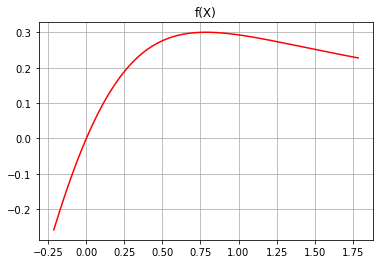

In [268]:
x = np.linspace(0.786-1, 1.786, 150)
plt.plot(x, f(x), color="r")
plt.title("f(X)")
plt.grid(True)
plt.plot()

# Choose a method to solve for the following:

$$min. g(x) = e^x - x^3$$

Specify parameters and plot the function within the interval that contains the optimum. 

In [326]:
#Newton - Rhapson

def g(x):
    global control
    control += 1
    return (math.e**x) - (x**3)

def deriv_g(x):
    global control_primera
    control_primera += 1
    return (math.e**x) -3*(x**2)

def second_deriv_g(x):
    global control_segunda
    control_segunda += 1
    return (math.e**x) - 6*x

In [294]:
def Newton_Raphson(x,epsilon):
    global control_primera
    control_primera = 0
    
    fd = deriv_g(x)
    fD2 = second_deriv_g(x)
    while abs(fd)>epsilon:
        x = x - (fd/fD2)
        fd = deriv_f(x)
        fD2 = second_deriv_f(x)
        
    return (x, g(x)), control_primera

In [296]:
Newton_Raphson(2.5,0.001)

((0.7838195002619884, 1.7082627870781988), 11)

In [299]:
Newton_Raphson(2,0.001)

((0.7882073928123257, 1.709759828456015), 12)

In [300]:
Newton_Raphson(1.5,0.001)

((0.7837627734769412, 1.708243115784429), 11)

In [301]:
Newton_Raphson(1,0.001)

((0.7839731351396544, 1.708316022829315), 10)

In [306]:
Newton_Raphson(0.75,0.0001)

((0.7863290003004584, 1.7091249107573492), 14)

Por la izquierda, hacia -2.5 diverge esta función y parece ser uqe se atora alrededor de un mínimo local en 1.708 aproximadamente por la izquierda

In [297]:
Newton_Raphson(-2.5,0.001) 

((299.499879387953, 1.1779990735005977e+130), 3)

In [309]:
Newton_Raphson(2.075,0.001)

((0.7842555614995815, 1.70841373109376), 12)

In [330]:
def Bisection(epsilon, a, b):
    global control_primera
    control_primera = 0
    
    
    while True:
        z = (a+b)/2
        fz = deriv_g(z)
        if abs(fz)<=epsilon:
            break
            
        if fz<0:
            a = z
        else:
            b = z
        z = (a+b)/2
        fz = deriv_g(z)
    return (z,g(z)), control_primera

Curiosamente ahora encontramos otro mínimo en el punto x = 3.733 por lo que parece que no es una función unimodal.

In [332]:
Bisection(0.0001,0,5)

((3.733081817626953, -10.21610066532692), 35)

El método de Bisección ha utilizado el intervalo entre 0 y 5. Mientras que Newton-Raphson se va aproximando por la izquierda, ya que por la derecha diverte mi método. Ergo, vamos a ver cómo está la gráfica entre estos dos puntos

[]

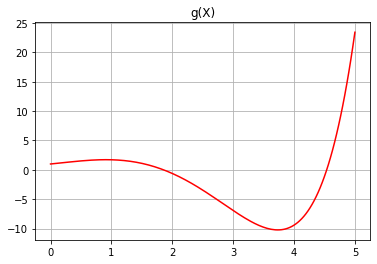

In [335]:
x = np.linspace(0, 5, 150)
plt.plot(x, g(x), color="r")
plt.title("g(X)")
plt.grid(True)
plt.plot()

Y lo que es más: veamos alrededor del punto x=3.733

[]

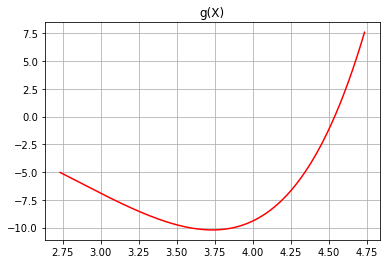

In [336]:
x = np.linspace(2.733, 4.733, 150)
plt.plot(x, g(x), color="r")
plt.title("g(X)")
plt.grid(True)
plt.plot()